# Analyze participants

By Ben Welsh

Analyzes the activity of participants in the California Civic Data Coalition's open-source projects.

## Import Python tools

In [27]:
import os
import math
import time
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from selenium import webdriver
import matplotlib.pyplot as plt
from IPython.core.display import Image

In [28]:
pd.options.display.max_rows = 5000
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [29]:
sns.set(color_codes=True)

In [30]:
%matplotlib inline

## Import data

In [31]:
this_dir = os.getcwd()
output_dir = os.path.join(this_dir, 'output')

In [32]:
participants = pd.read_csv(os.path.join(output_dir, "participants.csv"))

## Identify gaps in the data

In [33]:
sorted(participants[participants.name.isnull()].login)

['cecht',
 'charles-difazio',
 'danachinn',
 'doxrealm',
 'hackymcgee',
 'ianvonseggern1',
 'jayelle-o',
 'karkinosw',
 'katbuchholz',
 'malon',
 'mb10',
 'mjlorda',
 'mmhirsch',
 'pumadegit',
 'python-for-data-journalists',
 'rbhlibi',
 'regirob831',
 'samlo78',
 'soomilee',
 'soorinkimmm',
 'trinieic']

In [34]:
sorted(participants[participants.company.isnull()].login)

['4ndygu',
 'achou11',
 'agneskc',
 'aidanconnolly',
 'brizandrew',
 'cecht',
 'charles-difazio',
 'daguar',
 'danachinn',
 'djbridges',
 'doxrealm',
 'dwillis',
 'hackymcgee',
 'ianvonseggern1',
 'jayelle-o',
 'karkinosw',
 'katbuchholz',
 'malon',
 'mazhang2718',
 'mb10',
 'mbeveridge',
 'mjlorda',
 'mmhirsch',
 'patrickvossler18',
 'pumadegit',
 'python-for-data-journalists',
 'rbhlibi',
 'regirob831',
 'samlo78',
 'soomilee',
 'soorinkimmm',
 'trinieic']

In [35]:
sorted(participants[participants.location.isnull()].login)

['aidanconnolly',
 'cecht',
 'charles-difazio',
 'danachinn',
 'djbridges',
 'dwillis',
 'hackymcgee',
 'hodgesmr',
 'ianvonseggern1',
 'jayelle-o',
 'karkinosw',
 'katbuchholz',
 'malon',
 'mazhang2718',
 'mb10',
 'mjlorda',
 'mmhirsch',
 'patrickvossler18',
 'pumadegit',
 'python-for-data-journalists',
 'rbhlibi',
 'regirob831',
 'samlo78',
 'soomilee',
 'soorinkimmm',
 'trinieic']

In [36]:
sorted(participants[participants.email.isnull()].login)

['agneskc',
 'andyroberson',
 'annkiha',
 'brizandrew',
 'burtherman',
 'carloslemos',
 'caseymm',
 'cecht',
 'chagan',
 'charles-difazio',
 'chrislkeller',
 'danachinn',
 'danmit',
 'djbridges',
 'doxrealm',
 'drtortoise',
 'ebonymarieb',
 'elainewong',
 'emamd',
 'fagerlise',
 'frnsys',
 'hackymcgee',
 'hancush',
 'hodgesmr',
 'ianvonseggern1',
 'jayelle-o',
 'jennbrandel',
 'karkinosw',
 'katbuchholz',
 'kavyasukumar',
 'lilymihalik',
 'livlab',
 'malon',
 'mazhang2718',
 'mb10',
 'mbeveridge',
 'mhkeller',
 'mijebner',
 'mjlorda',
 'mmhirsch',
 'patrickvossler18',
 'pumadegit',
 'python-for-data-journalists',
 'qstin',
 'rbhlibi',
 'rdmurphy',
 'regirob831',
 'roncampbell',
 'samlo78',
 'soomilee',
 'soorinkimmm',
 'tocateunvals',
 'trinieic']

## GitHub totals 

In [37]:
unique_contributors = participants[participants.contributions > 0]

In [38]:
total_contributors = len(unique_contributors)
total_contributors

166

In [39]:
total_contributions = unique_contributors.contributions.sum()
total_contributions

6631

In [40]:
unique_contributors.contributions.describe()

count    166.00
mean      39.95
std      315.54
min        1.00
25%        1.00
50%        2.00
75%        4.00
max     3669.00
Name: contributions, dtype: float64

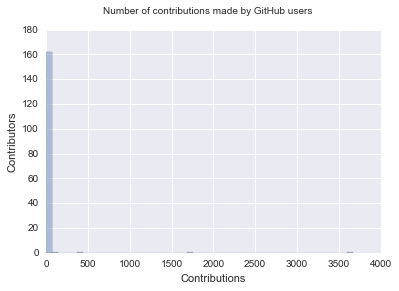

In [41]:
fig = plt.figure()
sns.distplot(unique_contributors.contributions, kde=False)
fig.suptitle("Number of contributions made by GitHub users")
plt.ylabel('Contributors')
plt.xlabel('Contributions')

## GitHub rankings

In [42]:
def rank_by_contributors(table, field):
    grouped = table.groupby(field, as_index=False)
    summed = grouped.login.count()
    summed.columns = [field, 'count']
    return summed

In [43]:
def rank_by_contributions(table, field):
    grouped = table.groupby(field, as_index=False)
    return grouped.contributions.sum()

In [44]:
def create_ranking(table, field):
    count = rank_by_contributors(table, field)
    summed = rank_by_contributions(table, field)
    merged = count.merge(summed)
    merged['count_percent'] = merged['count'] / total_contributors
    merged['contributions_percent'] = merged['contributions'] / total_contributions
    return merged.sort_values("contributions", ascending=False)

In [45]:
top_names = create_ranking(unique_contributors, 'name')[['name', 'contributions', 'contributions_percent']]
top_names.head(20)

,name,contributions,contributions_percent
23,Ben Welsh,3669,0.55
66,James Gordon,1748,0.26
0,Aaron Williams,379,0.06
129,Sahil Chinoy,130,0.02
2,Agustin Armendariz,69,0.01
25,Bill Chambers,47,0.01
19,Anthony Pesce,41,0.01
29,Casey Miller,34,0.01
78,Juan Elosua,29,0.00
94,Luciana Godoy,25,0.00


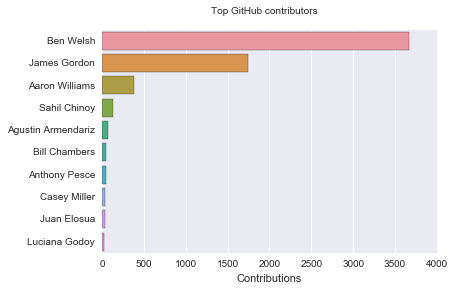

In [46]:
fig = plt.figure()
sns.barplot(y="name", x="contributions", data=top_names.head(10))
fig.suptitle("Top GitHub contributors")
plt.ylabel('')
plt.xlabel('Contributions')

In [47]:
top_companies = create_ranking(unique_contributors, 'company')
top_companies.head(20)

,company,count,contributions,count_percent,contributions_percent
52,Los Angeles Times,15,3755,0.09,0.57
20,California Civic Data Coalition,1,1748,0.01,0.26
84,Washington Post,4,389,0.02,0.06
77,UC Berkeley,1,130,0.01,0.02
58,New York Times,4,74,0.02,0.01
5,@databricks,1,47,0.01,0.01
53,Mozilla OpenNews,7,47,0.04,0.01
82,Vox Media,2,37,0.01,0.01
55,NPR,1,29,0.01,0.00
85,tocateunvals,1,25,0.01,0.00


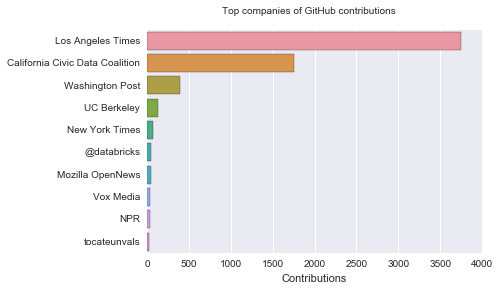

In [48]:
fig = plt.figure()
sns.barplot(y="company", x="contributions", data=top_companies.head(10))
fig.suptitle("Top companies of GitHub contributions")
plt.ylabel('')
plt.xlabel('Contributions')

In [49]:
top_locations = create_ranking(unique_contributors, 'location')
top_locations.head(20)

,location,count,contributions,count_percent,contributions_percent
31,"Los Angeles, CA",18,3761,0.11,0.57
14,"Columbia, MO",2,1749,0.01,0.26
56,"Washington, DC",18,440,0.11,0.07
7,"Berkeley, CA",4,180,0.02,0.03
36,"New York, NY",19,168,0.11,0.03
10,"Buenos Aires, Argentina",5,30,0.03,0.00
44,"San Francisco, CA",9,29,0.05,0.00
12,"Chicago, IL",4,25,0.02,0.00
9,"Bristol, UK",1,23,0.01,0.00
3,"Austin, TX",5,22,0.03,0.00


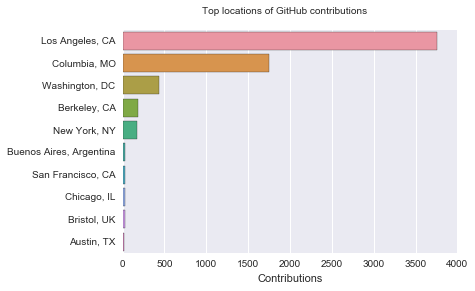

In [50]:
fig = plt.figure()
sns.barplot(y="location", x="contributions", data=top_locations.head(10))
fig.suptitle("Top locations of GitHub contributions")
plt.ylabel('')
plt.xlabel('Contributions')

In [51]:
location_map_data = top_locations.merge(
    unique_contributors.groupby(['location', 'location_x', 'location_y']).size().reset_index()
)

In [52]:
def calculate_radius(column, value, scale=300000):
    max_value = location_map_data[column].max()
    return math.sqrt(float(value) / max_value) * scale

In [53]:
def screenshot_map(name):
    url = "file://{}/{}.html".format(output_dir, name)
    outfn = os.path.join(output_dir, "{}.png".format(name))
    browser = webdriver.Firefox()
    browser.set_window_size(1000, 750)
    browser.get(url)
    time.sleep(2)
    browser.save_screenshot(outfn)
    browser.quit()

In [54]:
contributor_map = folium.Map(location=[35, -102], zoom_start=2, tiles="Mapbox Bright")
for i, row in location_map_data.iterrows():
    radius = calculate_radius('count', row['count'])
    folium.CircleMarker([row.location_y, row.location_x],
        radius=radius,
        popup=row.location.decode("utf-8"),
        color='#3186cc',
        fill_color='#3186cc',
        fill_opacity=0.25,
    ).add_to(contributor_map)

In [55]:
contributor_map.save(os.path.join(output_dir, "contributor_map.html"))

In [56]:
screenshot_map("contributor_map")

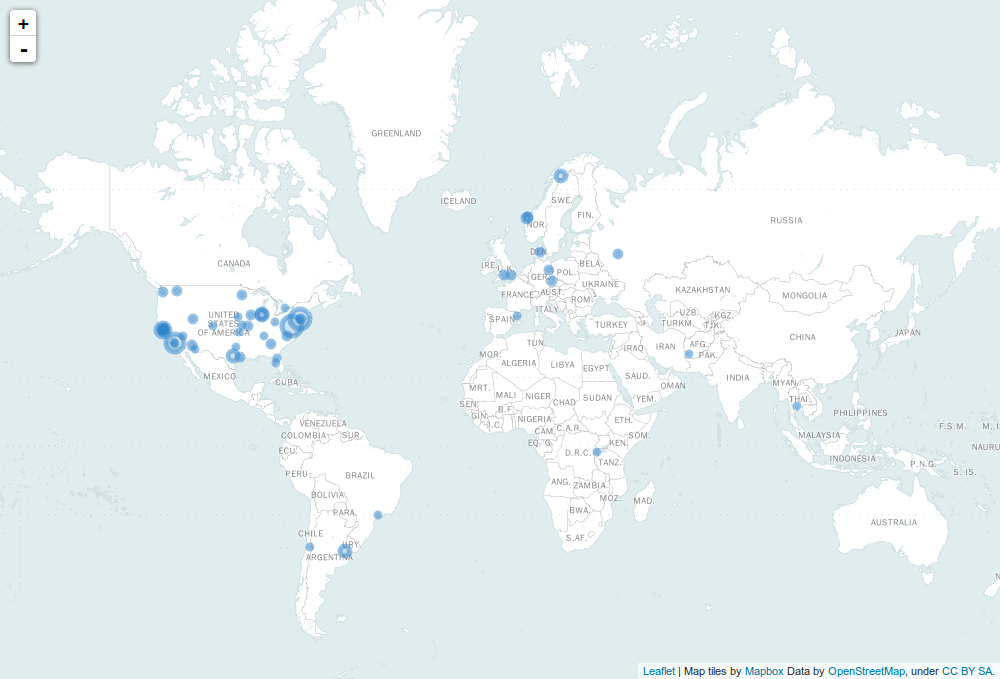

In [57]:
Image(os.path.join(output_dir, "contributor_map.png"))

In [58]:
contributions_map = folium.Map(location=[35, -102], zoom_start=2, tiles="Mapbox Bright")
for i, row in location_map_data.iterrows():
    radius = calculate_radius('contributions', row['contributions'])
    folium.CircleMarker([row.location_y, row.location_x],
        radius=radius,
        popup=row.location.decode("utf-8"),
        color='#3186cc',
        fill_color='#3186cc',
        fill_opacity=0.25,
    ).add_to(contributions_map)

In [59]:
contributions_map.save(os.path.join(output_dir, "contributions_map.html"))

In [60]:
screenshot_map("contributions_map")

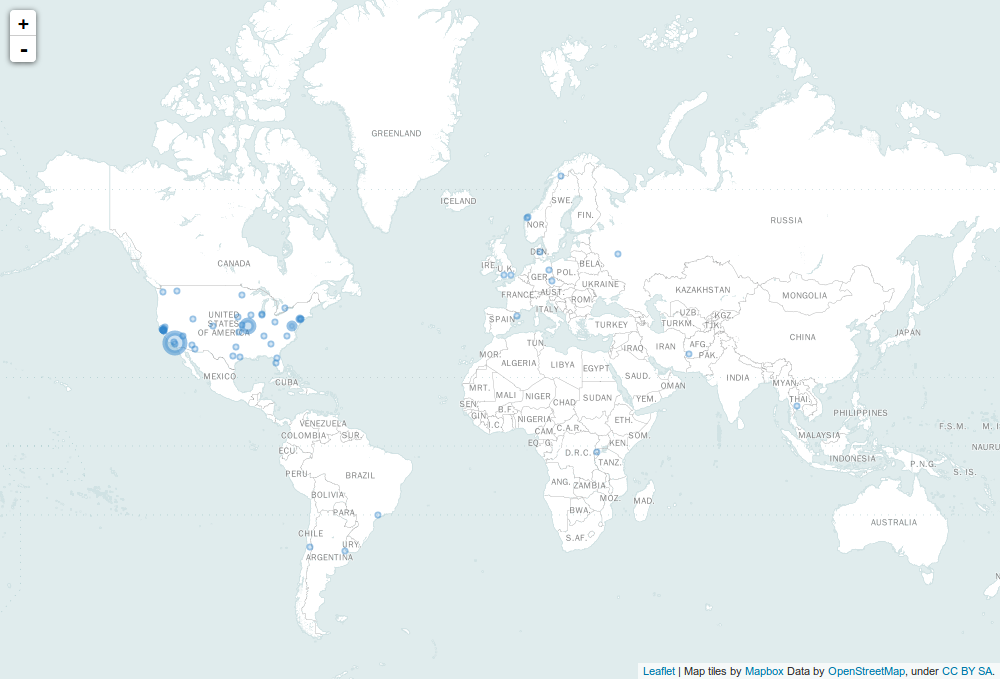

In [61]:
Image(os.path.join(output_dir, "contributions_map.png"))

In [62]:
create_ranking(unique_contributors, 'in_coalition').head(20)

,in_coalition,count,contributions,count_percent,contributions_percent
1,True,7,6007,0.04,0.91
0,False,159,624,0.96,0.09


In [63]:
create_ranking(unique_contributors, 'in_california').head(20)

,in_california,count,contributions,count_percent,contributions_percent
1,True,41,3996,0.25,0.60
0,False,125,2635,0.75,0.40


In [64]:
create_ranking(unique_contributors, 'in_usa').head(20)

,in_usa,count,contributions,count_percent,contributions_percent
1,True,117,6511,0.70,0.98
0,False,17,54,0.10,0.01


In [65]:
create_ranking(unique_contributors, 'state').head(20)

,state,count,contributions,count_percent,contributions_percent
2,CA,41,3996,0.25,0.60
10,MO,3,1750,0.02,0.26
4,DC,18,440,0.11,0.07
15,NY,19,168,0.11,0.03
9,IL,7,32,0.04,0.00
20,UK,2,29,0.01,0.00
19,TX,8,29,0.05,0.00
13,NE,1,12,0.01,0.00
5,FL,2,10,0.01,0.00
23,WA,2,9,0.01,0.00


In [66]:
top_countries = create_ranking(unique_contributors, 'country')
top_countries.head(20)

,country,count,contributions,count_percent,contributions_percent
17,United States of America,116,6510,0.70,0.98
0,Argentina,5,30,0.03,0.00
11,Rwanda,1,11,0.01,0.00
5,Czech Republic,1,9,0.01,0.00
10,Norway,4,4,0.02,0.00
9,Moscow,1,4,0.01,0.00
2,Brazil,1,2,0.01,0.00
3,Canada,1,2,0.01,0.00
8,Greater NYC Area,1,2,0.01,0.00
12,Sacramento,1,2,0.01,0.00


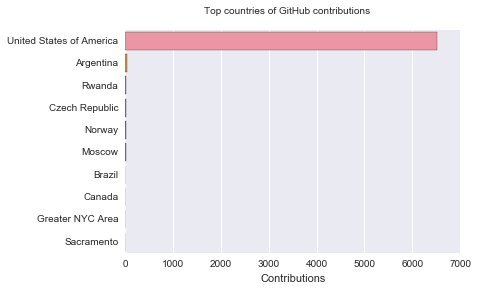

In [67]:
fig = plt.figure()
sns.barplot(y="country", x="contributions", data=top_countries.head(10))
fig.suptitle("Top countries of GitHub contributions")
plt.ylabel('')
plt.xlabel('Contributions')